# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [84]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

## Load data set

In [36]:
iris = datasets.load_iris()

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
X = iris.data
y = iris.target

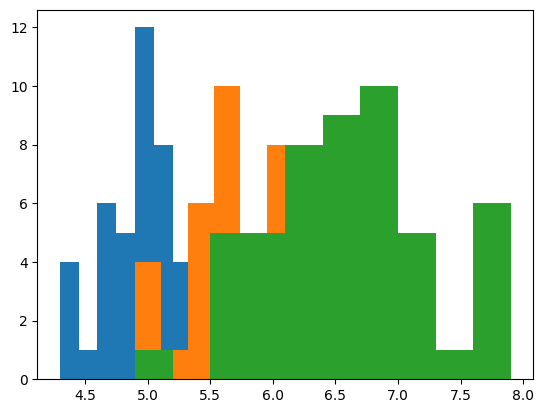

In [49]:
x = X[:,0]
for i in range(3):
    plt.hist(x[y==i])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

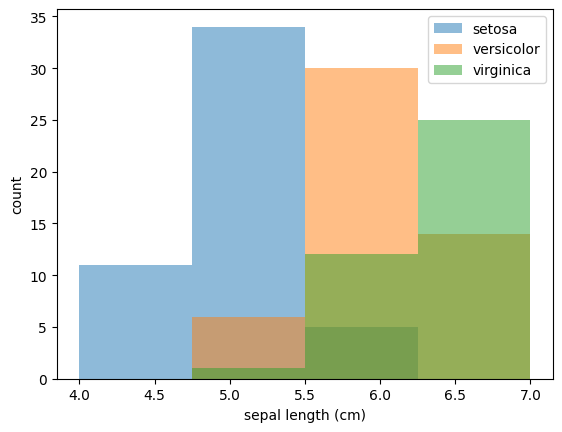

In [43]:
x = X[:,0]

bins = np.linspace(4,7,5)

for i in range(3):
    plt.hist(x[y==i],bins,alpha=0.5, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [51]:
hist = np.zeros((3,4))
for i in range(3):
    lengths = x[y==i]
    hist[i] =  np.histogram(lengths, bins)[0]


In [52]:
hist

array([[11., 34.,  5.,  0.],
       [ 0.,  6., 30., 14.],
       [ 0.,  1., 12., 25.]])

In [53]:
counts = pd.DataFrame(hist, columns=['4-4.75','4.75-5.5','5.5-6.25','6.25-7'], index=iris.target_names)
counts

,4-4.75,4.75-5.5,5.5-6.25,6.25-7
setosa,11.0,34.0,5.0,0.0
versicolor,0.0,6.0,30.0,14.0
virginica,0.0,1.0,12.0,25.0


In [54]:
proba = counts
for i in range(counts.shape[1]):
    proba.iloc[:,i] = proba.iloc[:,i]/proba.iloc[:,i].sum()
proba

,4-4.75,4.75-5.5,5.5-6.25,6.25-7
setosa,1.0,0.829268,0.106383,0.000000
versicolor,0.0,0.146341,0.638298,0.358974
virginica,0.0,0.024390,0.255319,0.641026


In [55]:
np.random.choice(iris.target_names, size=10, p=proba['4.75-5.5'])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa'], dtype='<U10')

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

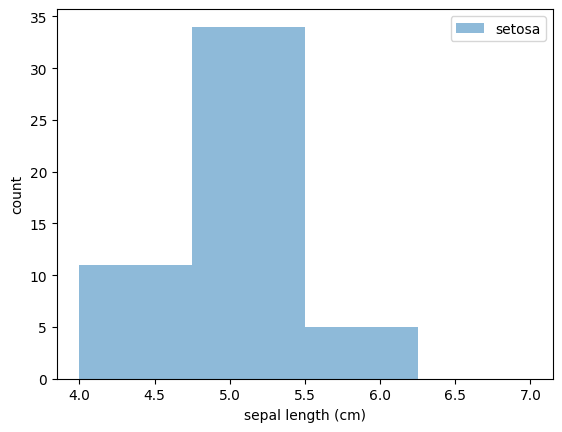

In [166]:
x = X[:,0]

bins = np.linspace(4,7,5)

plt.hist(x[y==0],bins,alpha=0.5, label=iris.target_names[0])
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [167]:
setosa_lengths = x[y==0]
setosa_hist = np.histogram(setosa_lengths, bins)[0]
setosa_hist

array([11, 34,  5,  0], dtype=int64)

In [168]:
setosa_proba = setosa_hist / np.sum(setosa_hist)
setosa_proba

array([0.22, 0.68, 0.1 , 0.  ])

In [169]:
setosa_valores = np.random.choice(bins[:-1], size=10, p=setosa_proba)
setosa_valores

array([4.75, 4.  , 4.75, 4.75, 5.5 , 4.  , 4.75, 4.75, 4.  , 4.75])

In [173]:
def get_low_high(bins, valor):
    for i in range(len(bins) - 1):
        if bins[i] == valor:
            return bins[i], bins[i+1]

In [174]:
for setosa_valor in setosa_valores:
    low, high = get_low_high(bins, setosa_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
4.75 5.5
[5.14308594]
---
4.0 4.75
[4.17262358]
---
4.75 5.5
[4.79631798]
---
4.75 5.5
[5.15713892]
---
5.5 6.25
[5.64091225]
---
4.0 4.75
[4.73974522]
---
4.75 5.5
[4.94256586]
---
4.75 5.5
[4.86519539]
---
4.0 4.75
[4.02694169]
---
4.75 5.5
[5.33488155]


In [175]:
np.random.uniform(low, high, size=10)

array([5.42508921, 4.82244   , 4.90032463, 5.03892819, 5.12156405,
       4.81664026, 4.98108178, 5.47458372, 5.20294922, 5.2682182 ])

# P(Y)

In [176]:
Y = iris.target

count_class_0, count_class_1, count_class_2 = np.bincount(Y)
target_names = iris.target_names

y_values = [count_class_0, count_class_1, count_class_2]
p_y = y_values / np.sum(y_values)

df = pd.DataFrame(data = {'Proba': p_y, 'Labels': target_names})
df

,Proba,Labels
0,0.333333,setosa
1,0.333333,versicolor
2,0.333333,virginica


# P(X| y=Versicolor)

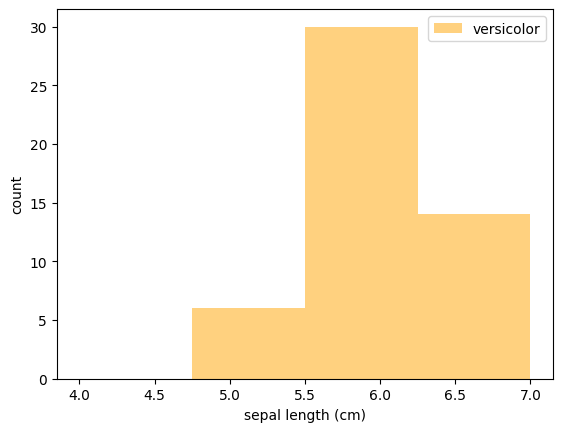

In [177]:
x = X[:,0]

bins = np.linspace(4,7,5)

plt.hist(x[y==1],bins,alpha=0.5, label=iris.target_names[1], color='orange')
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [197]:
versicolor_lengths = x[y==1]
versicolor_hist = np.histogram(versicolor_lengths, bins)[0]
versicolor_hist

array([ 0,  6, 30, 14], dtype=int64)

In [193]:
versicolor_proba = versicolor_hist / np.sum(versicolor_hist)
versicolor_proba

array([0.  , 0.12, 0.6 , 0.28])

In [194]:
versicolor_valores = np.random.choice(bins[:-1], size=10, p=versicolor_proba)
versicolor_valores

array([5.5 , 5.5 , 6.25, 5.5 , 5.5 , 4.75, 5.5 , 6.25, 5.5 , 5.5 ])

In [190]:
for versicolor_valor in versicolor_valores:
    low, high = get_low_high(bins, versicolor_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
5.5 6.25
[5.58727632]
---
6.25 7.0
[6.6958811]
---
5.5 6.25
[5.6696329]
---
5.5 6.25
[5.79483915]
---
5.5 6.25
[6.17603855]
---
6.25 7.0
[6.83434022]
---
5.5 6.25
[6.02395963]
---
6.25 7.0
[6.58301534]
---
5.5 6.25
[5.8837576]
---
5.5 6.25
[6.14464559]


# P(X| y=Virginica)

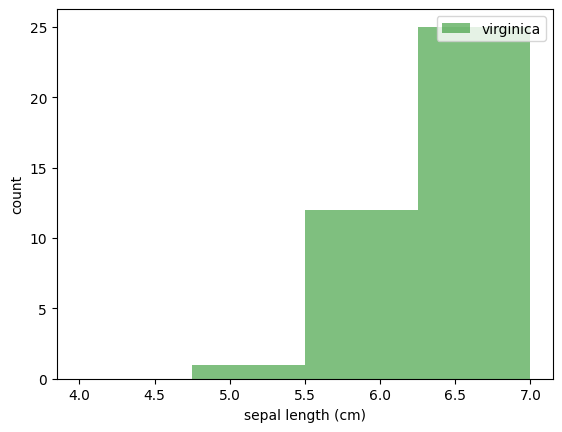

In [192]:
x = X[:,0]

bins = np.linspace(4,7,5)

plt.hist(x[y==2],bins,alpha=0.5, label=iris.target_names[2], color='green')
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()


In [200]:
virginica_lengths = x[y==2]
virginica_hist = np.histogram(virginica_lengths, bins)[0]
virginica_hist

array([ 0,  1, 12, 25], dtype=int64)

In [201]:
virginica_proba = virginica_hist / np.sum(virginica_hist)
virginica_proba

array([0.        , 0.02631579, 0.31578947, 0.65789474])

In [202]:
virginica_valores = np.random.choice(bins[:-1], size=10, p=virginica_proba)
virginica_valores

array([6.25, 6.25, 5.5 , 6.25, 6.25, 5.5 , 6.25, 6.25, 6.25, 6.25])

In [203]:
for virginica_valor in virginica_valores:
    low, high = get_low_high(bins, virginica_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
6.25 7.0
[6.26106106]
---
6.25 7.0
[6.83154591]
---
5.5 6.25
[5.80416887]
---
6.25 7.0
[6.30419664]
---
6.25 7.0
[6.87466879]
---
5.5 6.25
[5.62987473]
---
6.25 7.0
[6.96152417]
---
6.25 7.0
[6.33520376]
---
6.25 7.0
[6.32520425]
---
6.25 7.0
[6.99264596]


# P(sepal length) = P(x | y=setosa) P(y=setosa) + P(x | y=versicolor) P(y=versicolor) + P(x | y=virginica) P(y=virginica) 

In [221]:
setosa_valor = np.random.choice(bins[:-1], size=1, p=setosa_proba)
setosa_low, setosa_high = get_low_high(bins, setosa_valor)
s = np.random.uniform(setosa_low, setosa_high, size=1)

versicolor_valor = np.random.choice(bins[:-1], size=1, p=versicolor_proba)
versicolor_low, versicolor_high = get_low_high(bins, versicolor_valor)
v = np.random.uniform(versicolor_low, versicolor_high, size=1)

virginica_valor = np.random.choice(bins[:-1], size=1, p=virginica_proba)
virginica_low, virginica_high = get_low_high(bins, virginica_valor)
vi = np.random.uniform(virginica_low, virginica_high, size=1)

p_sepal_length = s*1/3 + v*1/3 + vi*1/3
print(p_sepal_length)


[5.9591274]


# Gaussianas

# oblig

y e {s, ve, vi} 

2.1 estimacion usando histogramas (linspace, digitize)

2.2 Mezcla de gaussianas , pl=N(mu0, sigma0) + N(mu1, sigma1) + N(mu2, sigma2)

In [78]:
data = iris.data
target = iris.target
# Separamos los datos por clases
x = X[:,0]
setosa_data = x[y==0]
versicolor_data = x[y==1]
virginica_data = x[y==2]

# Estimamos los parámetros de la distribución gaussiana para sepal length
mean_setosa = np.mean(setosa_data)
std_setosa = np.std(setosa_data)
print(f'Setosa') 
print(f'mean: {mean_setosa}') 
print(f'std: {std_setosa}') 

mean_versicolor = np.mean(versicolor_data)
std_versicolor = np.std(versicolor_data)
print(f'Versicolor') 
print(f'mean: {mean_versicolor}') 
print(f'std: {std_versicolor}') 

mean_virginica= np.mean(virginica_data)
std_virginica = np.std(virginica_data)
print(f'Virginica') 
print(f'mean: {mean_virginica}') 
print(f'std: {std_virginica}') 

Setosa
mean: 5.006
std: 0.3489469873777391
Versicolor
mean: 5.936
std: 0.5109833656783751
Virginica
mean: 6.587999999999998
std: 0.6294886813914926


In [71]:

gaussian_setosa = np.random.normal(loc=mean_setosa, scale=std_setosa, size=None)
gaussian_setosa

5.554390912370137

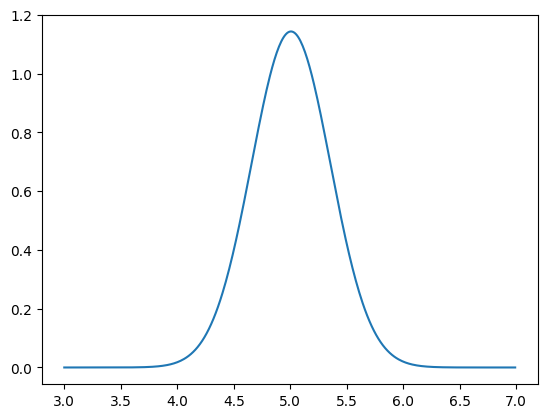

In [83]:

x = np.arange(3, 7, 0.01)
plt.plot(x, norm.pdf(x, mean_setosa, std_setosa))

In [90]:
gaussian_versicolor = np.random.normal(loc=mean_versicolor, scale=std_versicolor, size=None)
gaussian_versicolor

6.079613655432075

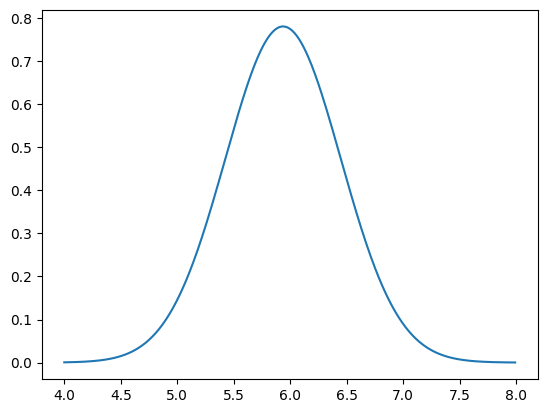

In [93]:

x = np.arange(4, 8, 0.01)
plt.plot(x, norm.pdf(x, mean_versicolor, std_versicolor))

In [73]:
gaussian_virginica = np.random.normal(loc=mean_virginica, scale=std_virginica, size=None)
gaussian_virginica

6.6308370144013224

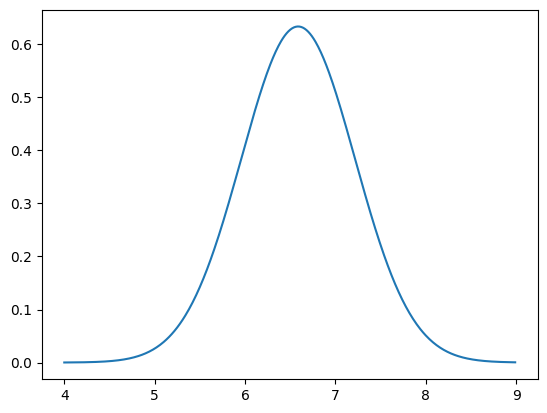

In [95]:
x = np.arange(4, 9, 0.01)
plt.plot(x, norm.pdf(x, mean_virginica, std_virginica))

In [96]:
gaussian_setosa = np.random.normal(loc=mean_setosa, scale=std_setosa, size=None)
gaussian_versicolor = np.random.normal(loc=mean_versicolor, scale=std_versicolor, size=None)
gaussian_virginica = np.random.normal(loc=mean_virginica, scale=std_virginica, size=None)
prob_sepal_length = gaussian_setosa*1/3 + gaussian_versicolor*1/3 + gaussian_virginica*1/3 
prob_sepal_length

6.063487825959779

Esto no va en esta notebook pero lo dejo

3. Autoregressive model (NN) + MNIST
4. Idea de obligatorio 2